In [17]:
#import 套件
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import matplotlib as mpl
import pandas as pd
import numpy as np
import datetime
#匯入Q1&Q2資料表
df = pd.read_csv("466900-2022.csv")
df = pd.DataFrame(df)
df["date"]=pd.to_datetime(df["測站最高氣壓時間(LST)"])
df["date"]=pd.to_datetime(df["date"].dt.date)
df2 = pd.read_csv("sales.csv")
df2 = pd.DataFrame(df2)


#### Question 1


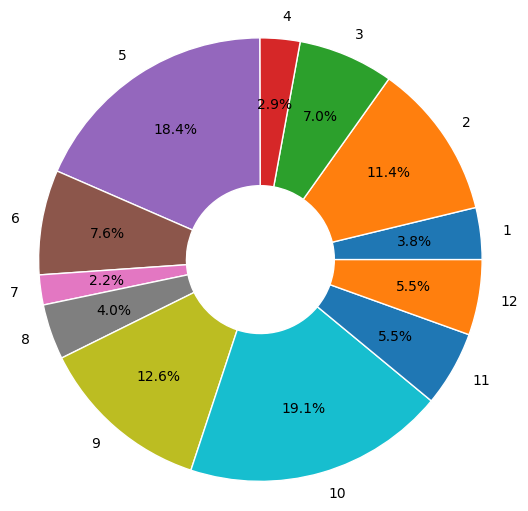

In [3]:
#Q1-A
#groupby,將每月的降水量利用groupby先集合起來
group_rainfall = df.groupby("月份(month)")
#再使用sum算出每個月的總降水量
f_df=group_rainfall.agg({'降水量(mm)':'sum'})
#畫出甜甜圈圖,調整wedgeprops裡的width參數，使得圓餅圖中有可以有個洞，以畫出甜甜圈的樣子
plt.pie(f_df["降水量(mm)"], labels=f_df.index,autopct='%.1f%%',textprops={'color':'black','size':10},pctdistance=0.7,radius=1.5, wedgeprops={'linewidth':1, 'edgecolor':'w','width':1})
plt.show()

/var/folders/f_/rnjcx52d45v_q1lj0ck1b9580000gn/T/ipykernel_17576/315903549.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('Reds')
/var/folders/f_/rnjcx52d45v_q1lj0ck1b9580000gn/T/ipykernel_17576/315903549.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm2 = plt.cm.get_cmap('Blues')


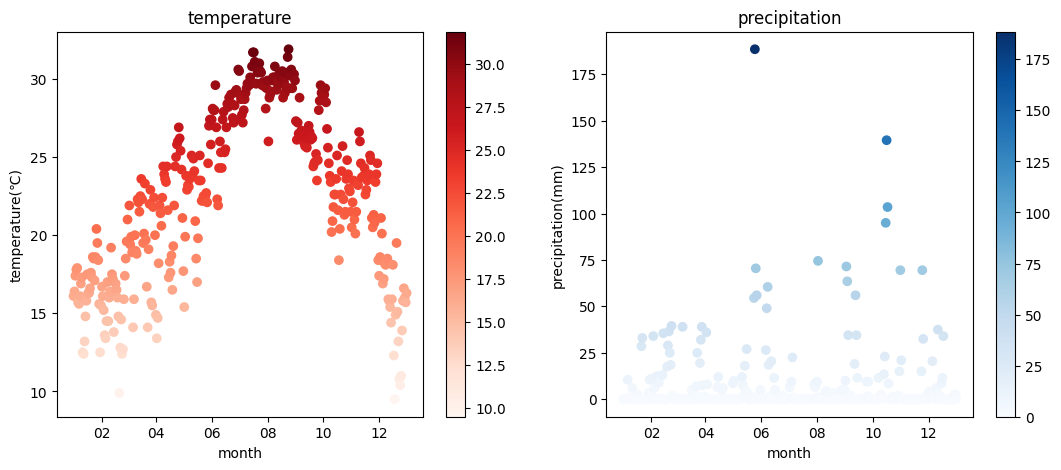

In [162]:
#Q1-B
import matplotlib as mpl
import matplotlib.dates as mdates 
fig = plt.figure(figsize=(13,5))   

#圖表的設定
x=[1,2,3,4,5,6]
ax = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

#設定子圖的標題以及x,y軸的標籤
ax.set_title("temperature")
ax.set_xlabel("month")
ax.set_ylabel("temperature(℃)")

#設定子圖的標題以及x,y軸的標籤
ax2.set_title("precipitation")
ax2.set_xlabel("month")
ax2.set_ylabel("precipitation(mm)")

#colormap
cm = plt.cm.get_cmap('Reds')
cm2 = plt.cm.get_cmap('Blues')

#繪製散佈圖，c與cmap是為了將散佈圖每個點顏色可以對照colorbar的顏色
a1 = ax.scatter(df["date"], df["氣溫(℃)"],c=df["氣溫(℃)"], cmap=cm)
a2 = ax2.scatter(df["date"], df["降水量(mm)"], c=df["降水量(mm)"] ,cmap=cm2)
#繪製colorbar
fig.colorbar(a1, ax=ax)
fig.colorbar(a2, ax=ax2)


#刻度，間隔3個月，只顯示月份
monthloc = mpl.dates.MonthLocator(bymonth=[2, 4, 6, 8,10,12])
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m"))
ax.xaxis.set_major_locator(monthloc) #設定x軸主刻度顯示格式（日期）
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%m"))
ax2.xaxis.set_major_locator(monthloc) #設定x軸主刻度間距

plt.plot()
plt.gca()
plt.show() 
#缺刻度

Text(0.8, 1, 'Average annual temperature22.6(℃)')

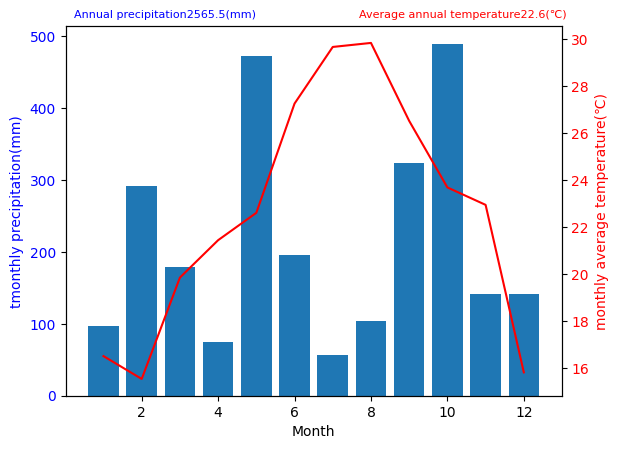

In [5]:
#Q1-C
#前置
fig, ax3 = plt.subplots()
plt.xlabel('Month')
#要疊在同張圖且要在左右y軸設定不同的刻度，要使用twinx
ax4=ax3.twinx()
#算出每月降水量總合以及平均氣溫
tmp = df.groupby("月份(month)").agg({'降水量(mm)':'sum','氣溫(℃)':'mean'})
#設定總降水量的y軸及長條圖、左上角的全年總降水量標題：tmp["降水量(mm)"].sum()
ax3.set_ylabel('tmonthly precipitation(mm)',color='blue')
ax3.tick_params(axis='y', labelcolor='blue')
ax3.bar(tmp.index,tmp["降水量(mm)"])
tot_p=str(round(tmp["降水量(mm)"].sum(),1))
title1 = 'Annual precipitation'+tot_p+'(mm)'
ax3.set_title(title1,x=0.2,y=1,color='blue',size=8)
#設定平均氣溫的y軸及折線圖、右上角的全年平均氣溫標題：tmp["氣溫(℃)"].mean()
ax4.set_ylabel('monthly average temperature(℃)',color='red')
ax4.tick_params(axis='y', labelcolor='red')
ax4.plot(tmp.index,tmp["氣溫(℃)"],color='red')
avg_t=str(round(tmp["氣溫(℃)"].mean(),1))
title2 = 'Average annual temperature'+avg_t+'(℃)'
ax4.set_title(title2,x=0.8,y=1,color='red',size=8)

#### Question 2

In [6]:
#Q2
import seaborn as sns
data = pd.read_csv('sales.csv')
data = pd.DataFrame(data)

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

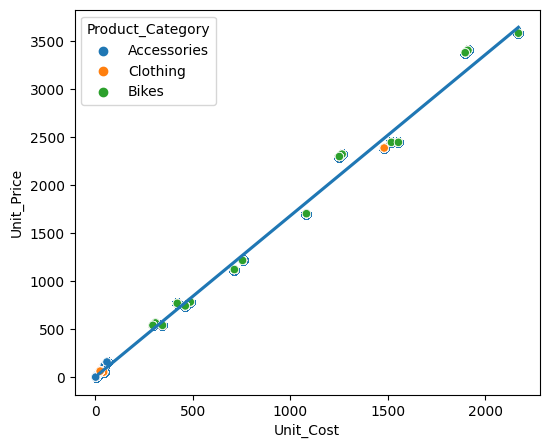

In [96]:
#Q2-A分布圖＋回歸線
#利用seaborn套件繪製分佈圖跟回歸線
fig = plt.figure(figsize=(6,5))
sns.regplot(data=data, x='Unit_Cost', y='Unit_Price')
#hue：利用某一欄的內容去分類
sns.scatterplot(data=data, hue='Product_Category', x='Unit_Cost', y='Unit_Price')

(array([       0.,  2500000.,  5000000.,  7500000., 10000000., 12500000.,
        15000000., 17500000., 20000000., 22500000.]),
 [Text(0, 0.0, '0.00'),
  Text(0, 2500000.0, '0.25'),
  Text(0, 5000000.0, '0.50'),
  Text(0, 7500000.0, '0.75'),
  Text(0, 10000000.0, '1.00'),
  Text(0, 12500000.0, '1.25'),
  Text(0, 15000000.0, '1.50'),
  Text(0, 17500000.0, '1.75'),
  Text(0, 20000000.0, '2.00'),
  Text(0, 22500000.0, '2.25')])

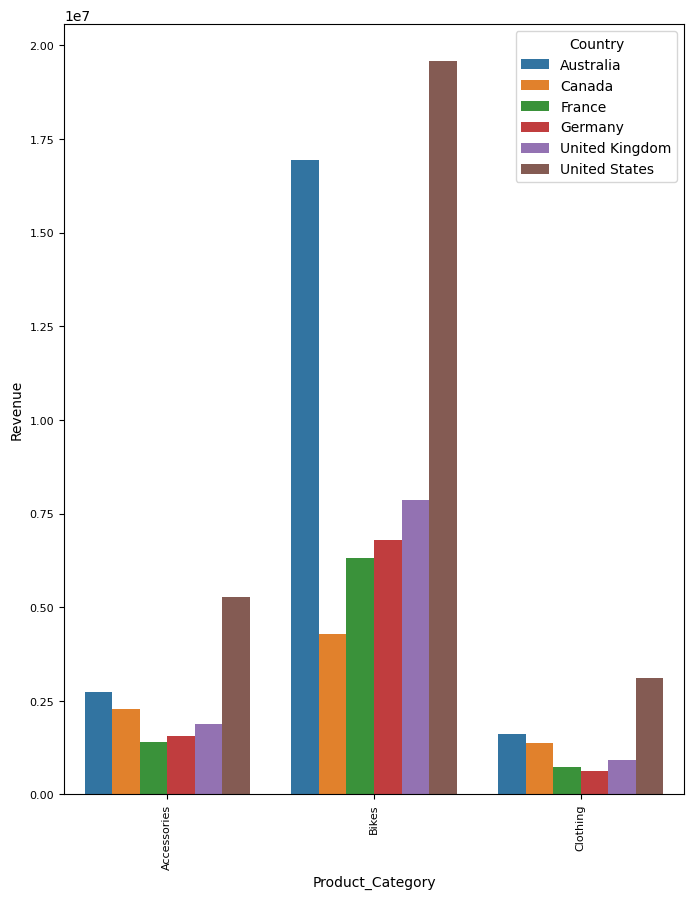

In [90]:
#Q2-B
#計算不同類型的產品(Product_Category)在不同國家的(Country)的總銷售收入 (Revenue)，並以顏色區分國家，畫出長條圖，輸出結果範例:
#圖片尺寸設定
fig = plt.figure(figsize=(8,10))
#利用國家與商品類別分類，算出每個國家在每個商品上的總收入   
t = data.groupby(['Country','Product_Category'],as_index=False).agg({'Revenue':'sum'})
#畫出分組柱狀圖，hue:分組依據
ax6=sns.barplot(x='Product_Category',y='Revenue',data=t,hue='Country',errwidth=0)
plt.xticks(rotation=90,fontsize=8)
plt.yticks(fontsize=8)
